In [2]:
import pandas as pd
df = pd.read_csv("insurance.csv")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [5]:
print('\n Number of rows and coloumns in the data set :',df.shape)


 Number of rows and coloumns in the data set : (1338, 7)


hθ(xi)=θ0+θ1age+θ2sex+θ3bmi+θ4children+θ5smoker+θ6region
 
This multiple linear regression equation for given dataset.
If i=1 then
hθ(x1)=θ0+θ119+θ2female+θ327.900+θ41+θ5yes+θ6southwest
y1=16884.92400
If i=3 then
hθ(x3)=θ0+θ128+θ2male+θ333.000+θ43+θ5no+θ6northwest
y3=4449.46200
Note: In python index starts from 0.
x1=(x11x12x13x14x15x16)=(19female27.9001nonorthwest)

Text(0.5, 1.0, 'Charge vs BMI')

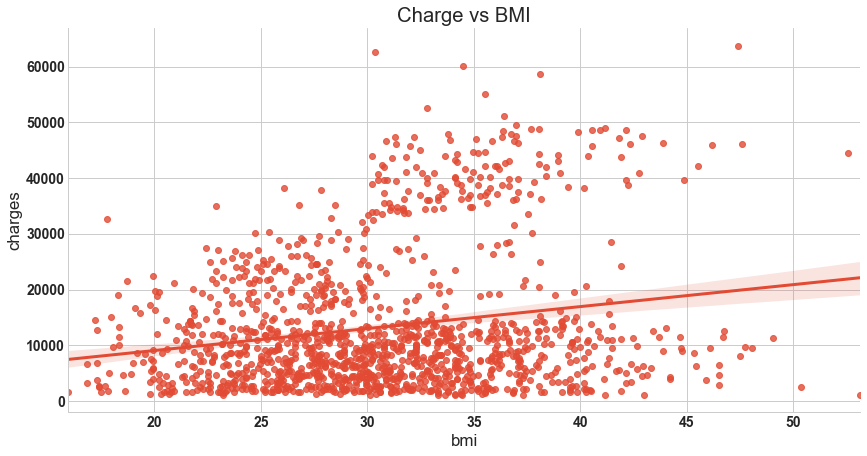

In [87]:
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size']=14
plt.rcParams['font.weight']='bold'
sns.lmplot(x='bmi',y='charges',data = df,aspect =2,height =6)
plt.style.use('seaborn-whitegrid')
plt.title("Charge vs BMI")

In [17]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
df.isnull().values.any()

False

In [20]:
df.isnull().values.sum()

0

Text(0.5, 1.0, 'missing value in the dataset')

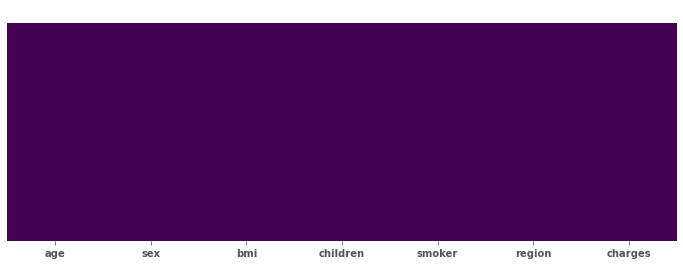

In [83]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.title('missing value in the dataset')

PLOTS

correlation plot

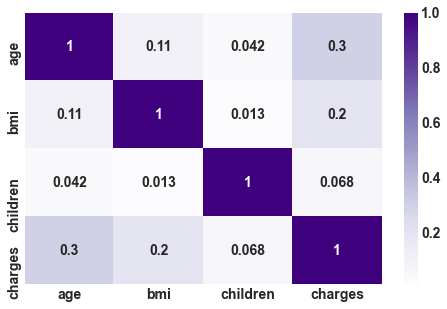

In [89]:
correlation = df.corr()
sns.heatmap(correlation, cmap='Purples', annot =True);

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


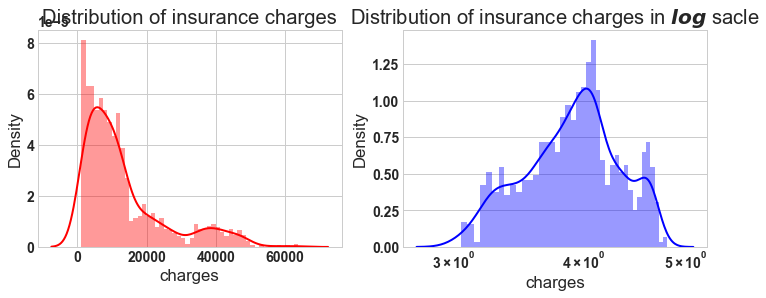

In [90]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');


VIOLIN PLOT

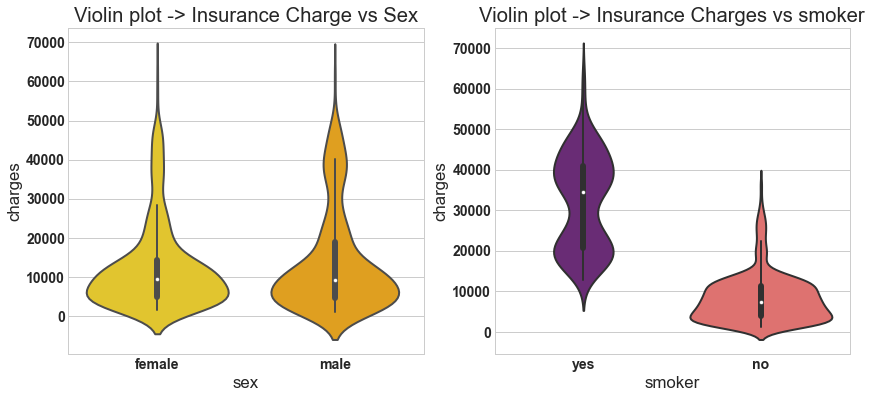

In [91]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y ='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot -> Insurance Charge vs Sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot -> Insurance Charges vs smoker');

BOX PLOT

Text(0.5, 1.0, 'insurance charges vs no of children')

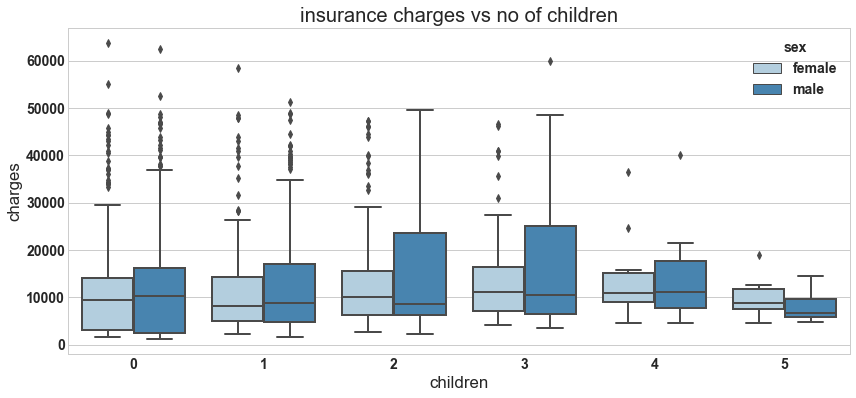

In [92]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children',y='charges', hue = 'sex',data=df,palette='Blues')
plt.title('insurance charges vs no of children')

In [81]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Text(0.5, 1.0, 'Insurance vs childrean')

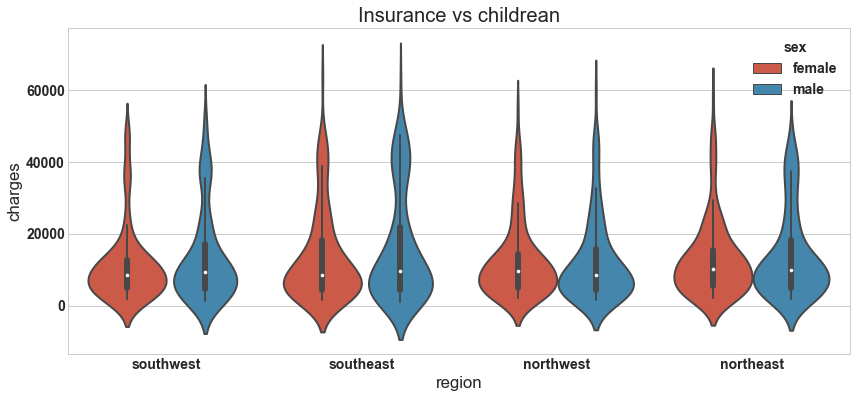

In [93]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region',y='charges',hue ='sex',data =df)
plt.title('Insurance vs childrean')


Scatter plot

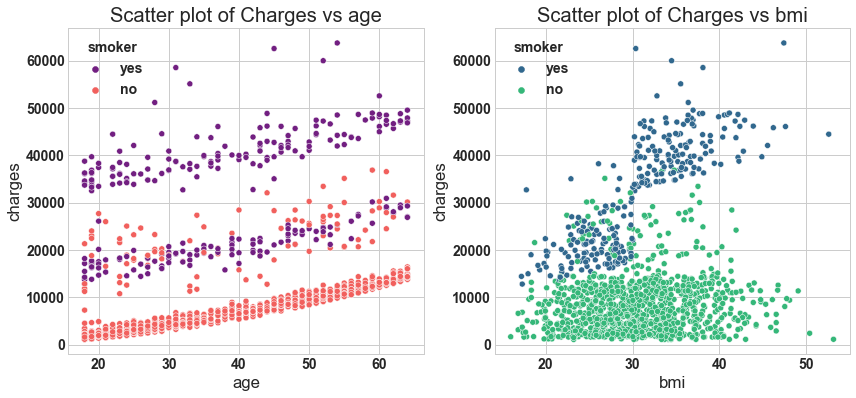

In [94]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

Data preprocessing 

In [106]:
#dummy variable

categorical_columns = ['sex' , 'children' ,'smoker' ,'region' ]

In [107]:
df_encoded = pd.get_dummies(data = df,
               columns = categorical_columns,drop_first=True,dtype='int8')
df_encoded.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


In [108]:
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encoded.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encoded.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'sex_male' 'children_1' 'children_2' 'children_3'
 'children_4' 'children_5' 'smoker_yes' 'region_northwest'
 'region_southeast' 'region_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [109]:
from scipy.stats import boxcox

In [110]:
transformed_variable,lambda_value,confidence_interval = boxcox(df_encoded['charges'],alpha=0.05)

In [112]:
lambda_value,confidence_interval

(0.043649053770664956, (-0.01140290617294196, 0.0988096859767545))

In [120]:
transformed_variable

array([12.12897974,  8.80859638, 10.14752106, ...,  8.72968299,
        9.01913128, 12.9736611 ])

In [114]:
#log transform
df_encoded['charges'] = np.log(df_encoded['charges'])

In [117]:
df_encoded['charges'].head()

0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: charges, dtype: float64

Train Test Split

In [123]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('charges',axis=1) # independent variable
y = df_encoded['charges'] #dependent variable

In [124]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state=23)

Linear regression model

In [126]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.



LinearRegression()

In [129]:
lin_reg.score(X_test,y_test)

0.7795687545055319